# Exploratory Data Analysis on Iris Dataset

**Author:** Blessing Aganaga

**Purpose:** Exploratory Data Analysis (EDA) on the Iris dataset  
**Date:** 2025-05-27


## Imports

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##  Load Data

In [18]:
# Load the Iris dataset into a pandas DataFrame
iris_df = sns.load_dataset('iris')

# Show the column names
print("Columns:", iris_df.columns.tolist())

# Show the first 5 rows to preview the data
iris_df.head()


Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
# Show first 10 rows
iris_df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [20]:
# Check the shape (rows, columns)
iris_df.shape


(150, 5)

In [21]:
# Check data types of each column
iris_df.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [22]:
# More detailed info about the DataFrame
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
iris_df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Initial Descriptive Statistics

The summary statistics provide key insights into the numerical features of the Iris dataset:

- Count confirms there are 150 entries for each numerical column.
- The mean values show average sizes for sepal and petal dimensions.
- The standard deviation indicates variability within each feature.
- Min and max values reveal the range for each measurement.
- The quartiles help understand the distribution spread and potential outliers.

These statistics give us a solid overview of the dataset’s numeric characteristics and help guide further analysis and visualization.


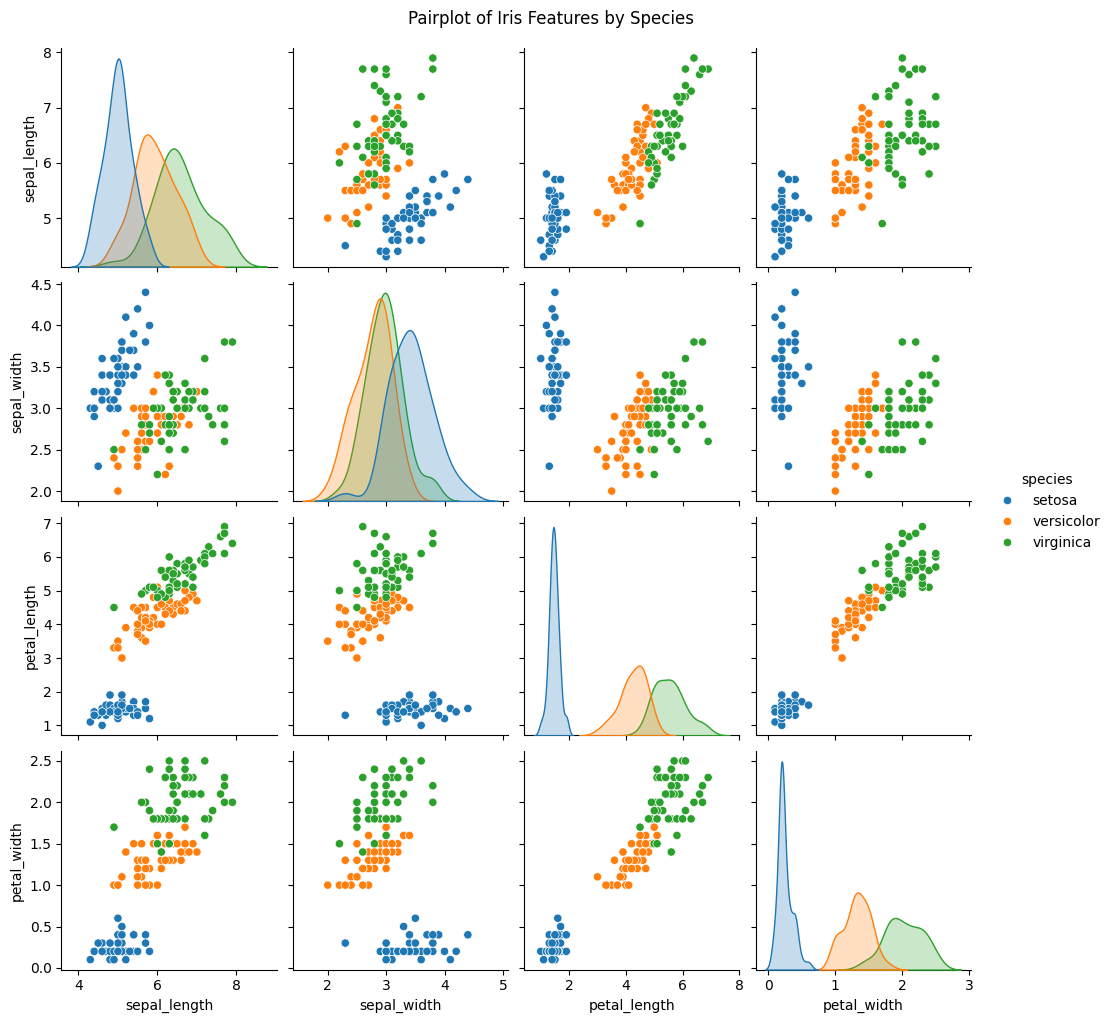

In [24]:
# Visualize pairwise relationships in the dataset
sns.pairplot(iris_df, hue="species")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


## Pairplot for Visual Exploration

This pairplot allows us to explore the relationships between all combinations of features in the Iris dataset, with different species color-coded.

- Strong separation is visible in petal length and width across species.
- Setosa is clearly distinct from the other species.
- Versicolor and Virginica show more overlap but still exhibit some separation.

This helps us understand how well features differentiate species and which features may be most useful for classification.


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


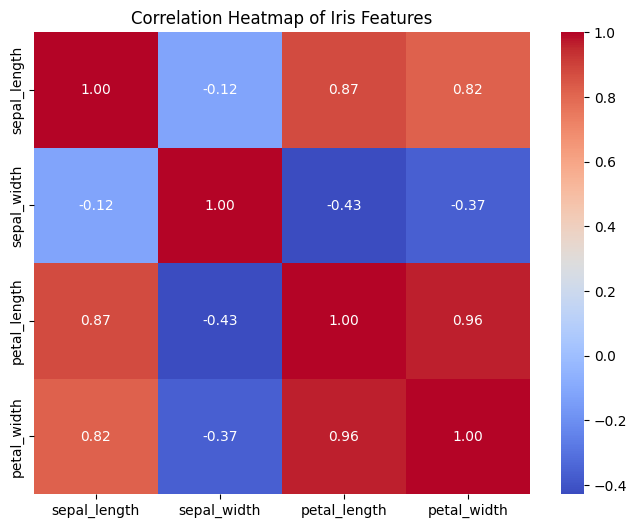

In [25]:
# Calculate correlation matrix
correlation_matrix = iris_df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()


## Correlation Matrix and Heatmap

The correlation matrix and heatmap provide insights into how strongly features are linearly related:

- **Petal length and petal width** show a strong positive correlation, suggesting they grow together.
- **Sepal width** has weaker correlations with the other features.
- Understanding these relationships helps identify potential multicollinearity and informs feature selection for modeling.

This step deepens our understanding of the data structure and variable relationships.


In [26]:
# Group by species and calculate summary statistics
grouped_stats = iris_df.groupby('species').describe()
grouped_stats


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

##  Grouped Summary Statistics by Species

By grouping the data by species, we observe:

- **Setosa** tends to have smaller petal lengths and widths compared to other species.
- **Virginica** generally has the largest petal dimensions.
- Differences in measurements across species support their use in classification models.

This grouped analysis gives clearer insights into how each species differs across features.


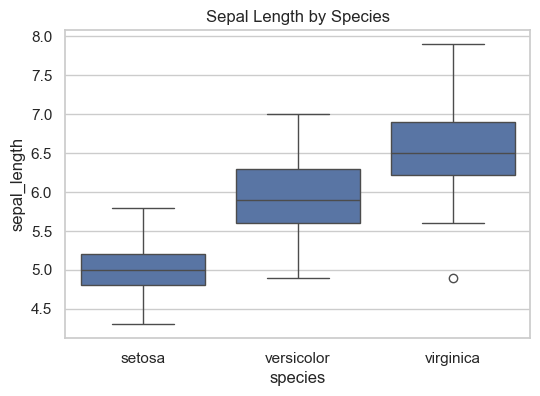

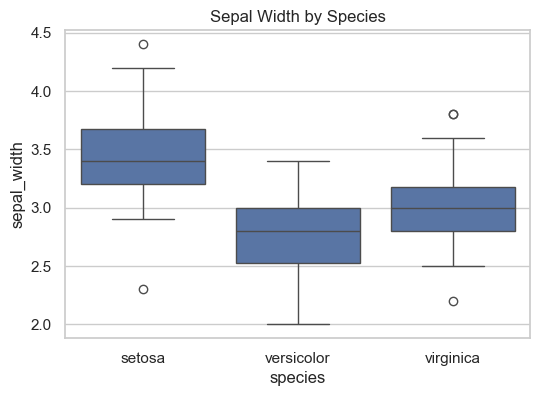

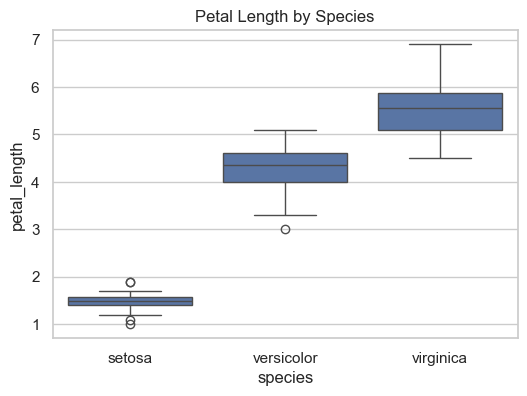

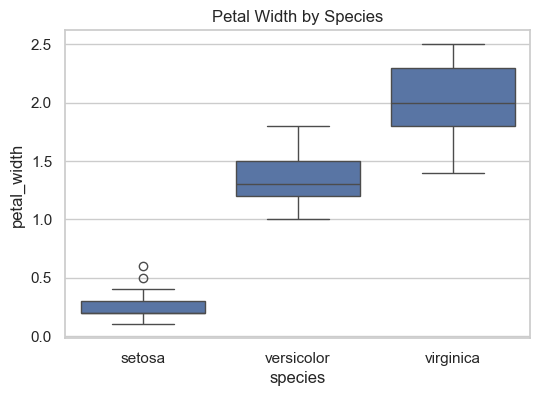

In [27]:
# Set the plotting style
sns.set(style="whitegrid")

# Create boxplots for each feature grouped by species
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature.replace("_", " ").title()} by Species')
    plt.show()


##  Boxplots by Species

These boxplots highlight the distribution of each numeric feature across the three Iris species:

- **Petal length and width** show the most distinct separation by species, especially for Virginica.
- **Sepal features** overlap more, indicating they may be less useful for distinguishing species.
- The visual distribution supports the summary statistics and confirms that petal measurements are key for classification.


## Conclusion & Next Steps

### Key Findings:
- The Iris dataset is well-balanced across three species, each with 50 samples.
- Petal length and petal width are highly effective for distinguishing species.
- Sepal measurements are less distinct across species but still informative.
- Visualizations like pair plots, histograms, and boxplots revealed strong species-specific patterns.

### Next Steps:
- Build a classification model (e.g., logistic regression or decision tree) to predict species based on features.
- Explore correlation and feature importance for model performance.
- Try dimensionality reduction techniques like PCA for visualization and preprocessing.
- Apply similar EDA techniques to a different dataset for practice and comparison.

This exploratory data analysis gives a strong foundation for future predictive modeling and deeper insights into flower classification.
